# Unit #5 Code

The goals of this assignment are to help you (1) use numerical simulation to analyze and interpret important statistical inference quantities, (2) calculate probabilities using R, and (3) estimate probabilities and other quantities through numerical (computer) simulation. Such simulations can be useful. We can use simulations to help confirm that we've calculated a probability "by hand" correctly, or to estimate other quantities, like areas/integrals!


## Problem #1

Let $\widehat{\theta}$ be an estimator of the parameter $\theta$ (e.g., we might think of $\widehat{\theta} = \bar{X}$ and $\theta = \mu$, where $\mu$ is a population mean). We say that $\widehat{\theta}$ is *unbiased* if $E(\widehat{\theta}) = \theta$.

**1.(a) Let $X_1,...,X_n \stackrel{iid}\sim \mathcal{P}(\lambda).$ Find an unbiased estimator for $\lambda$.**

Let $\hat{\theta} = \bar{x}$, Then $E(\bar{x}) = \frac{1}{n}E(\sum x_i) = \frac{1}{n} = \frac{1}{n}\sum E(x_i) = \frac{1}{n}\sum \lambda = \lambda$

**1.(b) Let $X_1,...,X_n \stackrel{iid}\sim Exp(\lambda).$ Find the MLE for $\lambda$.**

The marginal pdf of $X_i \sim Exp(\lambda)$ is given as 
$$f(x; \lambda) = \lambda e^{-\lambda x)}, x > 0$$
and zero otherwise. So, the joint pdf of $n$ iid exponentials is: 
$$f(x; \lambda) = \lambda^n e^{-\lambda \sum^n_{i=1}x_i}$$
which implies that the log-likelihood is
$$\mathcal{l}(\lambda) = n\log(\lambda) - \lambda \sum^n_{i=1}x_i$$
To maximize, we set the derivative of $\mathcal{l}(\lambda)$ to zero and solve for $\lambda$: 
$$
\begin{gather*}
    \mathcal{l}'(\lambda) = \frac{n}{\lambda} - \sum^n_{i=1}x_i = 0 \\
    \Rightarrow \frac{n}{\lambda} = \sum^n_{i=1}x_i = 0 \\
    \Rightarrow \hat{\lambda} = \frac{1}{\bar{x}}
\end{gather*} 
$$

## Problem #2

Let $X_1,...,X_n$ be an iid sample from a population with mean $\mu$ and variance $\sigma^2$.

**2.(a)   Show that $ S^2 = \frac{1}{n-1}\sum^n_{i=1}(X_i - \bar{X})^2$ is an unbiased estimator of $\sigma^2$. This answers the question of why we divide by $n-1$ in $S^2$!**

\begin{equation*}
\begin{split}
    E\left(\frac{1}{n-1}\sum(X_{i}-\bar{X})^2\right) & = \frac{1}{n-1}\sum E(X_{i}-\bar{X})^2\\
    & = \frac{1}{n-1}\sum[E(X_{i}^2) - 2E(X_{i}\bar{X}) + E(\bar{X}^2)]\\
    & = \frac{1}{n-1}[\sum(Var(X_{i})+\mu^2) - 2E(\bar{X}n\bar{X}) + E(\sum\bar{X}^2)]\\
    & = \frac{1}{n-1}[\sum(\sigma^2 + \mu^2) - 2nE(\bar{X}^2) + nE(\bar{X}^2)]\\
    & = \frac{1}{n-1}[n\sigma^2 + n\mu^2 - nE(\bar{X}^2)]\\
    & = \frac{1}{n-1}[n\sigma^2 + n\mu^2 - n(Var(\bar{X})+\mu^2)]\\
    & = \frac{1}{n-1}\bigg[n\sigma^2 + n\mu^2 - \frac{n\sigma^2}{n}-n\mu^2 \bigg]\\
    & = \frac{1}{n-1}\bigg[n\sigma^2 - \frac{n\sigma^2}{n}\bigg] = \frac{1}{n-1}\bigg[\frac{n^2\sigma^2 - n\sigma^2}{n}\bigg]\\
    & = \frac{1}{n-1}\bigg[\frac{\sigma^2(n^2-n)}{n}\bigg] = \frac{1}{n-1}\bigg[\frac{\sigma^2n(n-1)}{n}\bigg]\\
    & = \frac{1}{n-1}[\sigma^2(n-1)] = \sigma^2\\
\end{split}
\end{equation*}

**2.(b)Assume that $E(\sqrt{X}) < \sqrt{E(X)}$. Show that $S$ is a *biased* estimator of $\sigma$.**

Note that $E(S) = E(\sqrt{s^2}) < \sqrt{E(S^2)}  = \sqrt{\sigma^2} = \sigma$. Thus, $E(S) \neq \sigma$ and $S$ is biased

**2.(c) Use simulations to provide some evidence that $S$ is biased. Specifically:**

1. Generate `m = 500` different samples of size `n = 5` from $Exp(1)$.
2. Calculate $S$ for each sample.
3. What is the mean of the distribution of $S$? 
4. Creat a histogram of the distribution of $S$. Comment on the distribution. How does this provide evidence that $S$ is biased?


[1] 0.8804305

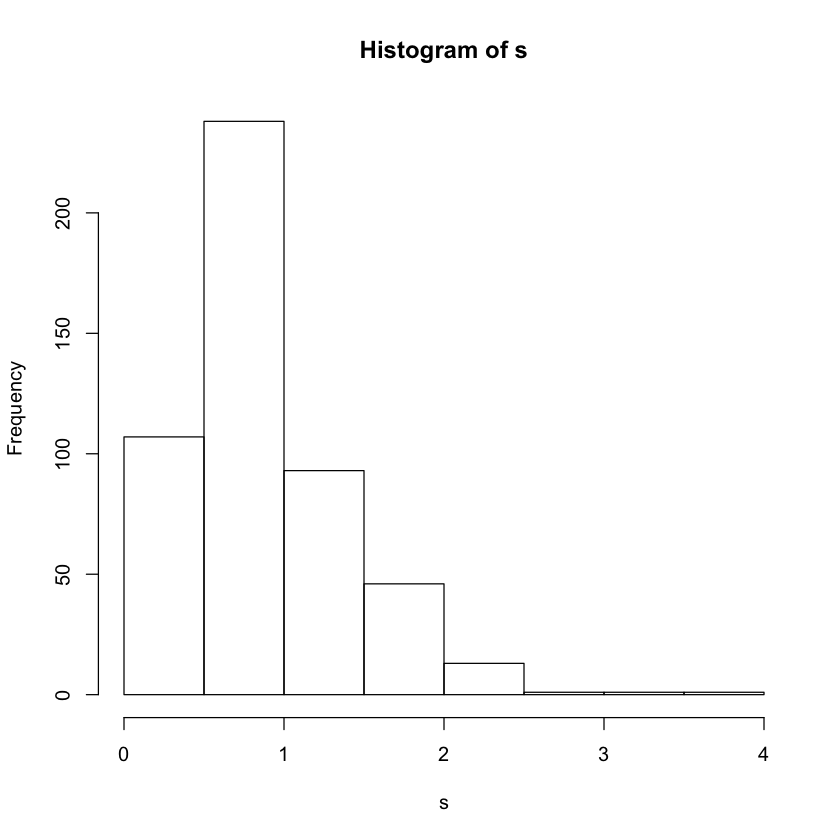

In [1]:
n = 500; 
x = t(replicate(n, rexp(5,1)))
s = apply(x, 1, sd)
mean(s)
hist(s)

If $X \sum Exp(\lambda = 1)$ then $\sigma^2 = Var(X) = \frac{1}{\lambda^2} = 1 \Rightarrow \sigma = sd(X) = 1$. But the sampling distribution of S is estimated to be skewed, with a mean of $\approx 0.9 < 1$. 

**2.(d) Repeat the process described in (e) for $S^2$. What do you notice?**

[1] 1.034496

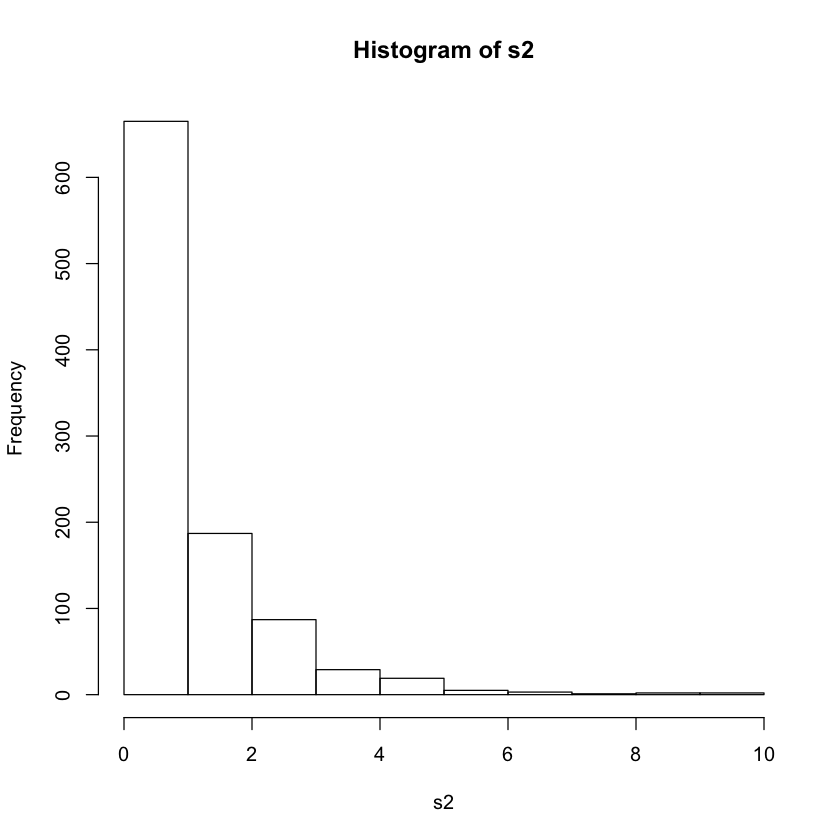

In [2]:
n = 1000
x = t(replicate(n, rexp(5,1)))
s2 = apply(x, 1, var)
mean(s2)
hist(s2)

Here the mean of the sampling distribution of $S^2$ is much closer to one.  

## Problem #3

A response time is normally distributed with standard deviation of 25 milliseconds. A new system has been installed, and we wish to estimate the true average response time, $\mu$, for the new environment. 

**Assuming that the response times are still normally distributed with $\sigma = 25$, what sample size is necessary to ensure that the resulting 95% confidence has a width of (at most) 10?**

In [3]:
s = 25; alpha = 0.05; cv = qnorm(1-0.025); 
n = (2*cv*25/10)^2; 
n

[1] 96.03647

## Problem #4

The EPA considers indoor radon levels above 4 picocuries per liter (pCo/L) of air to be high enought to warrant amelioration effects. Tests in a sample of 200 homes found 127 of these sampled households to have indoor randon levels above 4 pCi/L. Calculate the 99% confidence interval for the proportion of homes with indoor radon levels above 4 pCi/L.

In [4]:
n = 200; 
p = 127/n; 
z = qnorm(1-0.01/2); 
se = sqrt(p*(1-p)/n); 
ci = c(p-z*se, p + z*se)
ci

[1] 0.547313 0.722687

## Problem #5

(a) Read in the dataset from this link: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv.

This dataset is related to a red Portuguese "Vinho Verde" wine. 

In [5]:
site = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = read.table(site, sep = ";", header = TRUE)
head(wine)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


**5.(a) Calculate a 90% confidence interval for the mean pH level.**

In [6]:
alpha = 0.1; 
n = length(wine$pH); 
z = qnorm(1-alpha/2); 
xbar = mean(wine$pH); 
s = sd(wine$pH); 
se = s/sqrt(n); 
ci = c(xbar - z*se, xbar + z*se)
ci

[1] 3.304763 3.317464

## Problem #6

In this example, we will construct a simulation to verify the “coverage properties” of a confidence interval for the mean of a normal distribution.

**6.(a) Simulate a matrix with `m = 1000` rows and `n = 100` columns, where each entry is a random number from the population model $N(0, 1)$. Interpret each row as a sample from the population.**


In [9]:
set.seed(097)
m = 1000; n = 100; 
x = replicate(m, rnorm(n, 0,1))

**6.(b) Suppose that we didn’t know the population mean, $\mu$, but wanted to estimate it using a confidence interval. For each sample, calculate the $95\%$ confidence for the mean, $\mu$. Assume $\sigma = 1$ is known.**

In [12]:
xbar = colMeans(x)
sigma = apply(x,2, sd)
confInt = cbind(xbar - 1.96*sigma/sqrt(n), xbar + 1.96*sigma/sqrt(n))
confInt


-0.24262677,0.13541964
-0.45649714,-0.02799240
-0.13306796,0.28471505
-0.28880435,0.07453601
-0.18584954,0.21587064
-0.19627838,0.20845538
-0.09967165,0.29493832
-0.17978565,0.16920718
-0.35503421,0.04152728
-0.32612186,0.08345731
-0.27072829,0.13404897


**6.(c) Why would we use a confidence interval instead of just reporting the sample mean $\bar{x}$?**

The sample mean $\bar{x}$ is a specific mean to that sample not the population. Therefore if we want an idea of where the true mean lies we rely on CI for more confidence. The sample mean $\bar{x}$ can lead us to false assumptions. 

**6.(d) Print and interpret the confidence interval for the first sample (i.e., when `m = 1`).**

In [30]:
x = rnorm(n, 0,1)
xbar = mean(x)
s = sd(x)
CI = c(xbar - 1.96*s/sqrt(n), xbar + 1.96*s/sqrt(n))
CI

[1] -0.2161250  0.1898242

This CI is a range of where the true mean might lie. We can say that we are $95\%$ confident that the mean lies in this interval. We are not saying that there is a $95\%$ chance that the true mean lies in this interval, NO. We can only say how confident we are with the interval. 

**6.(e) Justify why, in part (b), you can use critical values from the normal distribution or critical values from the t distribution.**

We use critical values from the normal distribution or t-distribution since the sample size is large(or small) and the underlying distribution is known to be normal. Also the standard deviation is assumed known(or unknown).  

**6.(f) Calculate the proportion of confidence intervals that cover the true μ. Does it match what theory suggests? If it deviates from what theory suggests, explain why.**

In [13]:
1- sum(confInt[,1]> 0 | confInt[,2] < 0)/m

[1] 0.935